In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read the shapefile as a GeoDataFrame
can = gpd.read_file("C:/Users/billz/OneDrive-UWaterloo/OneDrive - University of Waterloo/Desktop/Waterloo/WATERLOO 3B/BDC/gpr_000b11a_e/gpr_000b11a_e.shp")

In [2]:
# The first element
print(list(can.columns))
### many data 

['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR', 'geometry']


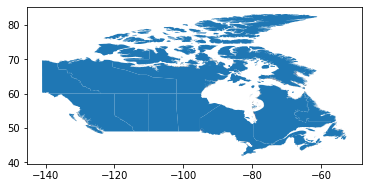

In [3]:
#plot the shapefile/GeoDataFrame
can.plot()

plt.show()

In [4]:
# sorted(can['PRENAME'])

In [5]:
# sorted(model_t_prov['province'])

In [6]:
can_map = can

In [7]:
can_map['geometry']

0     MULTIPOLYGON (((-123.53977 48.31735, -123.5397...
1     MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ...
2     MULTIPOLYGON (((-79.99352 51.27725, -79.99475 ...
3     MULTIPOLYGON (((-62.49302 46.02515, -62.49337 ...
4     POLYGON ((-102.00000 60.00000, -102.00000 59.9...
5     MULTIPOLYGON (((-136.47224 68.89388, -136.4705...
6     MULTIPOLYGON (((-95.15588 49.59155, -95.15657 ...
7     MULTIPOLYGON (((-82.68871 41.68453, -82.68631 ...
8     MULTIPOLYGON (((-66.76541 44.58377, -66.76462 ...
9     MULTIPOLYGON (((-133.43943 68.78677, -133.4430...
10    POLYGON ((-110.00000 60.00000, -110.00000 59.9...
11    MULTIPOLYGON (((-55.81707 46.85284, -55.81532 ...
12    MULTIPOLYGON (((-65.64770 43.40798, -65.64771 ...
Name: geometry, dtype: geometry

In [8]:
import pandas as pd
import numpy as np

In [9]:
## Reading in the csv data

data = pd.read_csv('time_series_covid19_confirmed_global.csv')

can_ind = data['Country/Region'] == 'Canada'

can_data = data[can_ind]

can_data = can_data.drop(columns = ['Country/Region', 'Lat', 'Long'])

In [10]:
can_data = can_data.T
can_data = can_data.drop(columns = [37, 231])
can_data = can_data.T

In [11]:
can_data

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
35,Alberta,0,0,0,0,0,0,0,0,0,...,6587,6644,6683,6716,6735,6768,6800,6818,6860,6879
36,British Columbia,0,0,0,0,0,0,1,1,1,...,2428,2428,2444,2446,2467,2479,2507,2517,2517,2530
38,Manitoba,0,0,0,0,0,0,0,0,0,...,289,289,290,290,290,290,292,292,292,292
39,New Brunswick,0,0,0,0,0,0,0,0,0,...,120,120,120,120,120,121,121,121,121,121
40,Newfoundland and Labrador,0,0,0,0,0,0,0,0,0,...,260,260,260,260,260,260,260,260,260,260
41,Nova Scotia,0,0,0,0,0,0,0,0,0,...,1037,1040,1043,1044,1045,1046,1048,1049,1050,1051
42,Ontario,0,0,0,0,1,1,1,1,1,...,23645,23974,24286,24755,25197,25595,26085,26560,26897,27302
43,Prince Edward Island,0,0,0,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27
44,Quebec,0,0,0,0,0,0,0,0,0,...,42192,42928,43636,44206,44784,45504,46150,46847,47420,47993
45,Saskatchewan,0,0,0,0,0,0,0,0,0,...,591,592,592,599,620,622,627,630,632,634


In [12]:
merge_map_data = pd.merge(can_map, can_data, left_on='PRENAME', right_on='Province/State')

In [13]:
merge_map_data = merge_map_data.drop(columns = ['Province/State'])

In [14]:
type(merge_map_data)

geopandas.geodataframe.GeoDataFrame

In [15]:
merge_map_data.columns

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry', '1/22/20', '1/23/20', '1/24/20',
       ...
       '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
       '5/22/20', '5/23/20', '5/24/20', '5/25/20'],
      dtype='object', length=132)

In [16]:
date_list = merge_map_data.columns.tolist()[7:]

In [17]:
# dates = date_list[-1]

# vmin, vmax = min(merge_map_data[dates]), max(merge_map_data[dates])

# fig, ax = plt.subplots(1, figsize=(10, 8))

# merge_map_data.plot(column = dates, cmap = 'OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# ax.set_title('Total Confirmed Coronavirus Cases: '+dates, 
#              fontdict = {'fontsize':20}, pad = 12.5)

# sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# cbar = fig.colorbar(sm, orientation="horizontal")

## Transfer Matrix Calculation

In [18]:
can_city = pd.read_csv('canadacities.csv')

In [19]:
can_city['index'] = range(len(can_city['city']))

In [20]:
can_city

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,index
0,Toronto,Toronto,43.7000,-79.4200,Canada,CA,CAN,Ontario,admin,5213000,1124279679,0
1,Montreal,Montreal,45.5000,-73.5833,Canada,CA,CAN,Québec,NaN,3678000,1124586170,1
2,Vancouver,Vancouver,49.2734,-123.1216,Canada,CA,CAN,British Columbia,NaN,2313328,1124825478,2
3,Ottawa,Ottawa,45.4167,-75.7000,Canada,CA,CAN,Ontario,primary,1145000,1124399363,3
4,Calgary,Calgary,51.0830,-114.0800,Canada,CA,CAN,Alberta,NaN,1110000,1124690423,4
5,Edmonton,Edmonton,53.5500,-113.5000,Canada,CA,CAN,Alberta,admin,1058000,1124290735,5
6,Hamilton,Hamilton,43.2500,-79.8300,Canada,CA,CAN,Ontario,NaN,721053,1124567288,6
7,Winnipeg,Winnipeg,49.8830,-97.1660,Canada,CA,CAN,Manitoba,admin,632063,1124224963,7
8,Quebec,Quebec,46.8400,-71.2456,Canada,CA,CAN,Québec,admin,624177,1124823933,8
9,Oshawa,Oshawa,43.8800,-78.8500,Canada,CA,CAN,Ontario,NaN,450963,1124541904,9


In [21]:
dim = len(can_city['city'])

In [22]:
from math import sin, cos, sqrt, atan2, radians

def lat_long_dist(lat1, lon1, lat2, lon2):
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    R = 6373.0
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [23]:
A = np.random.randint(0, 1, size = (dim * dim)).reshape(dim, dim)
names = can_city['index']
dist_matrix = pd.DataFrame(A, index=names, columns=names)

In [24]:
dist_matrix

index,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dist_matrix[0][1]

0

In [26]:
for i in range(dim):
    lat1 = can_city['lat'][i]
    lon1 = can_city['lng'][i]
    for j in range(dim):
        lat2 = can_city['lat'][j]
        lon2 = can_city['lng'][j]
        dist_matrix.at[i, j] = lat_long_dist(lat1, lon1, lat2, lon2)
dist_matrix

index,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
index,,,,,,,,,,,,,,,,,,,,,
0,0,11504,4720,12531,16567,3100,3640,6634,8646,3738,...,10961,6255,10358,13018,6365,8777,14846,2736,7972,7512
1,11504,0,16074,1083,5120,10716,14339,12437,7968,10483,...,13584,14627,2391,14306,8922,19687,3698,13339,6818,18979
2,4720,16074,0,17154,18160,5499,3243,5437,11382,5853,...,8944,5176,14269,9403,9424,4250,17790,2779,11603,2904
3,12531,1083,17154,0,4154,11786,15114,13193,7996,11531,...,12893,14835,3245,13279,9290,18620,2946,14423,7086,19951
4,16567,5120,18160,4154,0,14691,18523,13337,10426,14166,...,11520,15992,6268,10213,12448,14663,1794,17230,10278,15856
5,3100,10716,5499,11786,14691,0,6223,4129,11219,639,...,13749,9036,8773,14902,9053,9631,12955,2742,10101,8286
6,3640,14339,3243,15114,18523,6223,0,8142,8142,6817,...,7529,2823,13846,9380,6216,5842,18036,4029,8435,4895
7,6634,12437,5437,13193,13337,4129,8142,0,15252,3739,...,13955,10580,10046,12830,12990,7890,12352,4333,14230,6897
8,8646,7968,11382,7996,10426,11219,8142,15252,0,11716,...,6879,6847,9711,9656,2285,11931,10472,11176,1672,11972


In [27]:
dist_matrix[[4,55]]

index,4,55
index,,
0,16567,5816
1,5120,16807
2,18160,2609
3,4154,17420
4,0,17582
5,14691,7677
6,18523,2507
7,13337,8004
8,10426,9607


In [28]:
import copy 
dist_matrix_dup = copy.deepcopy(dist_matrix)  

In [29]:
## Change intensity, a parameter
intensity = 0.9
def prop_gen(dist):
    if dist == 0:
        return 0
    else:
        return 1 / (dist ** 2)

def prop_gen_list(series_index, intensity):
    total = sum(dist_matrix_dup[series_index].map(prop_gen))
    dist_matrix[series_index] = dist_matrix_dup[series_index].map(prop_gen).map(lambda x: (1 - intensity) * (x/total))

for i in range(dim):
    prop_gen_list(i, intensity)
    
    

In [30]:
dist_matrix.round(6)

index,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
index,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000019,0.000439,0.000030,0.000016,0.001242,0.000914,0.000519,0.000209,0.000871,...,0.000034,0.000305,0.000015,0.000050,0.000230,0.000034,0.000015,0.002147,0.000187,0.000027
1,0.000047,0.000000,0.000038,0.004058,0.000165,0.000104,0.000059,0.000148,0.000246,0.000111,...,0.000022,0.000056,0.000275,0.000041,0.000117,0.000007,0.000235,0.000090,0.000256,0.000004
2,0.000279,0.000010,0.000000,0.000016,0.000013,0.000395,0.001152,0.000773,0.000121,0.000355,...,0.000052,0.000446,0.000008,0.000095,0.000105,0.000147,0.000010,0.002081,0.000088,0.000182
3,0.000040,0.002094,0.000033,0.000000,0.000250,0.000086,0.000053,0.000131,0.000245,0.000092,...,0.000025,0.000054,0.000149,0.000048,0.000108,0.000008,0.000370,0.000077,0.000237,0.000004
4,0.000023,0.000094,0.000030,0.000276,0.000000,0.000055,0.000035,0.000129,0.000144,0.000061,...,0.000031,0.000047,0.000040,0.000081,0.000060,0.000012,0.000997,0.000054,0.000113,0.000006
5,0.000647,0.000021,0.000323,0.000034,0.000020,0.000000,0.000313,0.001341,0.000124,0.029808,...,0.000022,0.000146,0.000020,0.000038,0.000114,0.000029,0.000019,0.002137,0.000117,0.000022
6,0.000469,0.000012,0.000930,0.000021,0.000013,0.000308,0.000000,0.000345,0.000236,0.000262,...,0.000073,0.001499,0.000008,0.000096,0.000241,0.000078,0.000010,0.000990,0.000167,0.000064
7,0.000141,0.000016,0.000331,0.000027,0.000024,0.000700,0.000183,0.000000,0.000067,0.000871,...,0.000021,0.000107,0.000016,0.000051,0.000055,0.000043,0.000021,0.000856,0.000059,0.000032
8,0.000083,0.000039,0.000075,0.000074,0.000040,0.000095,0.000183,0.000098,0.000000,0.000089,...,0.000087,0.000255,0.000017,0.000090,0.001783,0.000019,0.000029,0.000129,0.004254,0.000011


In [31]:
for i in range(dim):
    dist_matrix.at[i,i] = intensity

In [32]:
dist_matrix

index,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
index,,,,,,,,,,,,,,,,,,,,,
0,0.900000,0.000019,0.000439,0.000030,0.000016,0.001242,0.000914,0.000519,0.000209,0.000871,...,0.000034,0.000305,0.000015,0.000050,0.000230,0.000034,0.000015,0.002147,0.000187,0.000027
1,0.000047,0.900000,0.000038,0.004058,0.000165,0.000104,0.000059,0.000148,0.000246,0.000111,...,0.000022,0.000056,0.000275,0.000041,0.000117,0.000007,0.000235,0.000090,0.000256,0.000004
2,0.000279,0.000010,0.900000,0.000016,0.000013,0.000395,0.001152,0.000773,0.000121,0.000355,...,0.000052,0.000446,0.000008,0.000095,0.000105,0.000147,0.000010,0.002081,0.000088,0.000182
3,0.000040,0.002094,0.000033,0.900000,0.000250,0.000086,0.000053,0.000131,0.000245,0.000092,...,0.000025,0.000054,0.000149,0.000048,0.000108,0.000008,0.000370,0.000077,0.000237,0.000004
4,0.000023,0.000094,0.000030,0.000276,0.900000,0.000055,0.000035,0.000129,0.000144,0.000061,...,0.000031,0.000047,0.000040,0.000081,0.000060,0.000012,0.000997,0.000054,0.000113,0.000006
5,0.000647,0.000021,0.000323,0.000034,0.000020,0.900000,0.000313,0.001341,0.000124,0.029808,...,0.000022,0.000146,0.000020,0.000038,0.000114,0.000029,0.000019,0.002137,0.000117,0.000022
6,0.000469,0.000012,0.000930,0.000021,0.000013,0.000308,0.900000,0.000345,0.000236,0.000262,...,0.000073,0.001499,0.000008,0.000096,0.000241,0.000078,0.000010,0.000990,0.000167,0.000064
7,0.000141,0.000016,0.000331,0.000027,0.000024,0.000700,0.000183,0.900000,0.000067,0.000871,...,0.000021,0.000107,0.000016,0.000051,0.000055,0.000043,0.000021,0.000856,0.000059,0.000032
8,0.000083,0.000039,0.000075,0.000074,0.000040,0.000095,0.000183,0.000098,0.900000,0.000089,...,0.000087,0.000255,0.000017,0.000090,0.001783,0.000019,0.000029,0.000129,0.004254,0.000011


In [33]:
average_prob = []

for i in range(dim):
    average_prob.append((sum(dist_matrix[i]) - intensity)/(dim - 1))
    
print(average_prob)

[0.00040650406504064986, 0.0004065040650406512, 0.0004065040650406557, 0.00040650406504065214, 0.0004065040650406503, 0.0004065040650406512, 0.00040650406504064986, 0.0004065040650406481, 0.0004065040650406512, 0.00040650406504065393, 0.0004065040650406503, 0.00040650406504064986, 0.0004065040650406512, 0.0004065040650406481, 0.0004065040650406485, 0.0004065040650406512, 0.000406504065040653, 0.00040650406504065214, 0.00040650406504064623, 0.00040650406504065393, 0.00040650406504065393, 0.00040650406504064894, 0.0004065040650406512, 0.0004065040650406485, 0.00040650406504064894, 0.00040650406504065214, 0.0004065040650406512, 0.00040650406504064943, 0.0004065040650406503, 0.00040650406504065393, 0.0004065040650406476, 0.00040650406504065214, 0.0004065040650406476, 0.0004065040650406512, 0.00040650406504064943, 0.00040650406504064894, 0.00040650406504065214, 0.0004065040650406485, 0.00040650406504064986, 0.0004065040650406481, 0.00040650406504064715, 0.00040650406504064943, 0.00040650406

## Plotting Coordinates on Infection Map

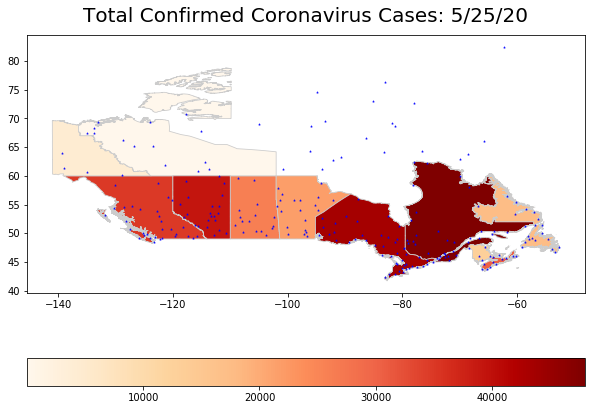

In [34]:
from shapely.geometry import Point, Polygon

crs = {'init':'epsg:4326'}


geometry = [Point(xy) for xy in zip(can_city['lng'], can_city['lat'])]
geo_df = gpd.GeoDataFrame(can_city, crs = crs, geometry = geometry)

dates = date_list[-1] #5/25/20 date variable

vmin, vmax = min(merge_map_data[dates]), max(merge_map_data[dates])

fig, ax = plt.subplots(1, figsize=(10, 8))

merge_map_data.plot(column = dates, cmap = 'OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

geo_df.plot(ax = ax, markersize = 1, color = 'blue', marker = '^')

ax.set_title('Total Confirmed Coronavirus Cases: '+dates, 
             fontdict = {'fontsize':20}, pad = 12.5)

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, orientation="horizontal")


In [35]:
# def voronoi_finite_polygons_2d(vor, radius=None):
#     if vor.points.shape[1] != 2:
#         raise ValueError("Requires 2D input")
#     new_regions = []
#     new_vertices = vor.vertices.tolist()
#     center = vor.points.mean(axis=0)
#     if radius is None:
#         radius = vor.points.ptp().max()
#     # Construct a map containing all ridges for a
#     # given point
#     all_ridges = {}
#     for (p1, p2), (v1, v2) in zip(vor.ridge_points,
#                                   vor.ridge_vertices):
#         all_ridges.setdefault(
#             p1, []).append((p2, v1, v2))
#         all_ridges.setdefault(
#             p2, []).append((p1, v1, v2))
#     # Reconstruct infinite regions
#     for p1, region in enumerate(vor.point_region):
#         vertices = vor.regions[region]
#         if all(v >= 0 for v in vertices):
#             # finite region
#             new_regions.append(vertices)
#             continue
#         # reconstruct a non-finite region
#         ridges = all_ridges[p1]
#         new_region = [v for v in vertices if v >= 0]
#         for p2, v1, v2 in ridges:
#             if v2 < 0:
#                 v1, v2 = v2, v1
#             if v1 >= 0:
#                 # finite ridge: already in the region
#                 continue
#             # Compute the missing endpoint of an
#             # infinite ridge
#             t = vor.points[p2] - \
#                 vor.points[p1]  # tangent
#             t /= np.linalg.norm(t)
#             n = np.array([-t[1], t[0]])  # normal
#             midpoint = vor.points[[p1, p2]]. \
#                 mean(axis=0)
#             direction = np.sign(
#                 np.dot(midpoint - center, n)) * n
#             far_point = vor.vertices[v2] + \
#                 direction * radius
#             new_region.append(len(new_vertices))
#             new_vertices.append(far_point.tolist())
#         # Sort region counterclockwise.
#         vs = np.asarray([new_vertices[v]
#                          for v in new_region])
#         c = vs.mean(axis=0)
#         angles = np.arctan2(
#             vs[:, 1] - c[1], vs[:, 0] - c[0])
#         new_region = np.array(new_region)[
#             np.argsort(angles)]
#         new_regions.append(new_region.tolist())
#     return new_regions, np.asarray(new_vertices)

In [36]:
can_map['geometry']

0     MULTIPOLYGON (((-123.53977 48.31735, -123.5397...
1     MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ...
2     MULTIPOLYGON (((-79.99352 51.27725, -79.99475 ...
3     MULTIPOLYGON (((-62.49302 46.02515, -62.49337 ...
4     POLYGON ((-102.00000 60.00000, -102.00000 59.9...
5     MULTIPOLYGON (((-136.47224 68.89388, -136.4705...
6     MULTIPOLYGON (((-95.15588 49.59155, -95.15657 ...
7     MULTIPOLYGON (((-82.68871 41.68453, -82.68631 ...
8     MULTIPOLYGON (((-66.76541 44.58377, -66.76462 ...
9     MULTIPOLYGON (((-133.43943 68.78677, -133.4430...
10    POLYGON ((-110.00000 60.00000, -110.00000 59.9...
11    MULTIPOLYGON (((-55.81707 46.85284, -55.81532 ...
12    MULTIPOLYGON (((-65.64770 43.40798, -65.64771 ...
Name: geometry, dtype: geometry

In [37]:
# from shapely.ops import unary_union

# unary_union(can_map['geometry'].tolist())

In [38]:
# fig, ax = plt.subplots(1, figsize=(10, 8))

# can_map.plot(color = 'blue', alpha = 0.1, linewidth=0.8, ax=ax, edgecolor='0.6')

# vor = Voronoi(city_numpy)

# voronoi_plot_2d(vor, ax = ax)

# ax.set_xlim(-80, -60)
# ax.set_ylim(40, 55)

# plt.show()

In [39]:
# for i, reg in enumerate(vor.regions):

#     print('Region:', i)
#     print('Indices of vertices of Voronoi region:', reg)
#     print('Associated point:', city_numpy[i], '\n')

NameError: name 'vor' is not defined

In [40]:
import shapely.geometry
import shapely.ops
lines = [
    shapely.geometry.LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]
voronoi_poly = shapely.ops.polygonize(lines)
geometry_list = list(voronoi_poly)

NameError: name 'vor' is not defined

In [ ]:
# geometry_list[44]

In [ ]:
# from collections import defaultdict

# from shapely.geometry import Polygon

# def voronoi_polygons(voronoi, diameter):
#     """Generate shapely.geometry.Polygon objects corresponding to the
#     regions of a scipy.spatial.Voronoi object, in the order of the
#     input points. The polygons for the infinite regions are large
#     enough that all points within a distance 'diameter' of a Voronoi
#     vertex are contained in one of the infinite polygons.

#     """
#     centroid = voronoi.points.mean(axis=0)

#     # Mapping from (input point index, Voronoi point index) to list of
#     # unit vectors in the directions of the infinite ridges starting
#     # at the Voronoi point and neighbouring the input point.
#     ridge_direction = defaultdict(list)
#     for (p, q), rv in zip(voronoi.ridge_points, voronoi.ridge_vertices):
#         u, v = sorted(rv)
#         if u == -1:
#             # Infinite ridge starting at ridge point with index v,
#             # equidistant from input points with indexes p and q.
#             t = voronoi.points[q] - voronoi.points[p] # tangent
#             n = np.array([-t[1], t[0]]) / np.linalg.norm(t) # normal
#             midpoint = voronoi.points[[p, q]].mean(axis=0)
#             direction = np.sign(np.dot(midpoint - centroid, n)) * n
#             ridge_direction[p, v].append(direction)
#             ridge_direction[q, v].append(direction)

#     for i, r in enumerate(voronoi.point_region):
#         region = voronoi.regions[r]
#         if -1 not in region:
#             # Finite region.
#             yield Polygon(voronoi.vertices[region])
#             continue
#         # Infinite region.
#         inf = region.index(-1)              # Index of vertex at infinity.
#         j = region[(inf - 1) % len(region)] # Index of previous vertex.
#         k = region[(inf + 1) % len(region)] # Index of next vertex.
#         if j == k:
#             # Region has one Voronoi vertex with two ridges.
#             dir_j, dir_k = ridge_direction[i, j]
#         else:
#             # Region has two Voronoi vertices, each with one ridge.
#             dir_j, = ridge_direction[i, j]
#             dir_k, = ridge_direction[i, k]

#         # Length of ridges needed for the extra edge to lie at least
#         # 'diameter' away from all Voronoi vertices.
#         length = 2 * diameter / np.linalg.norm(dir_j + dir_k)

#         # Polygon consists of finite part plus an extra edge.
#         finite_part = voronoi.vertices[region[inf + 1:] + region[:inf]]
#         extra_edge = [voronoi.vertices[j] + dir_j * length,
#                       voronoi.vertices[k] + dir_k * length]
#         yield Polygon(np.concatenate((finite_part, extra_edge)))

        
# points = np.array([[0.1, -2.4], [0, 1.5], [0, 2.25], [1, 0], [1, 1], [1, 2],
#                    [2, 0], [2.5, 1], [2, 2], [2.3, 2.3], [-0.5, -1.3], [-1.5, 3]])
# boundary = np.array([[-5, -2], [3.4, -2], [4.7, 4], [2.7, 5.7], [-1, 4]])

# x, y = boundary.T
# plt.xlim(round(x.min() - 1), round(x.max() + 1))
# plt.ylim(round(y.min() - 1), round(y.max() + 1))
# plt.plot(*points.T, 'b.')

# diameter = np.linalg.norm(boundary.ptp(axis=0))
# boundary_polygon = Polygon(boundary)
# for p in voronoi_polygons(Voronoi(points), diameter):
#     x, y = zip(*p.intersection(boundary_polygon).exterior.coords)
#     plt.plot(x, y, 'r-')

# plt.show()

In [97]:
import scipy.io
model_result = scipy.io.loadmat("model_pop.mat")["pop"]

In [98]:
model_result

array([[  12185, 3677354, 2313347, ...,      11,      14,       5],
       [  14408,       0,       0, ...,       0,       0,       0],
       [  36365,       0,       0, ...,       0,       0,       0],
       [  36642,       0,       0, ...,       0,       0,       0],
       [5112913,       0,       0, ...,       1,       0,       0]],
      dtype=int64)

In [42]:
model_result = pd.DataFrame(model_result)


In [43]:
model_result.T[4]

0      5112913
1            0
2            0
3            0
4            0
5            0
6            1
7            0
8            0
9            1
10           0
11           0
12           0
13           0
14           1
15           0
16           0
17           1
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
        ...   
217          0
218          0
219          0
220          0
221          0
222          0
223          0
224          1
225          1
226          0
227          0
228          0
229          0
230          0
231          0
232          1
233          0
234          0
235          0
236          1
237          0
238          0
239          0
240          0
241          0
242          0
243          0
244          1
245          0
246          0
Name: 4, Length: 247, dtype: int64

In [136]:
import matplotlib.colors as colors

def prov_aggregate(mat_df):
    model_t = mat_df.T
    model_t['city'] = can_city['city'].tolist()
    model_t['province'] = can_city['admin_name'].tolist()
    model_t_prov = model_t.groupby(["province"]).sum().reset_index()
    model_t_prov.columns = ['province', 'susceptible', 'latent', 'infected', 'asymtomatic', 'recovered']
    model_t_prov['confirmed'] = model_t_prov['infected'] + model_t_prov['asymtomatic'] + model_t_prov['recovered']
    model_t_prov = model_t_prov.drop(columns = ['infected', 'asymtomatic', 'recovered'])
    model_t_prov.replace('Québec', 'Quebec', inplace = True)
    return model_t_prov

def prov_aggregate_graph(mat_df, vmin, vmax, day):
    prov_aggregate_df = prov_aggregate(mat_df)
    print(prov_aggregate_df)
    merge_map_data = pd.merge(can_map, prov_aggregate_df, left_on='PRENAME', right_on='province')
    
    type_graph_list = prov_aggregate_df.columns.tolist()[1:]
    
    cmap_list = ['Blues', 'Oranges', 'OrRd']
    
    for index in range(len(type_graph_list)):
        type_graph = type_graph_list[index]
        
        crs = {'init':'epsg:4326'}

        geometry = [Point(xy) for xy in zip(can_city['lng'], can_city['lat'])]
        geo_df = gpd.GeoDataFrame(can_city, crs = crs, geometry = geometry)

        type_graph_str = type_graph[0].upper() + type_graph[1:] 

        fig, ax = plt.subplots(1, figsize=(10, 8))

        merge_map_data.plot(column = type_graph, cmap = cmap_list[index], 
                            norm = colors.Normalize(vmin=vmin, vmax=vmax),
                            linewidth=0.8, ax=ax, edgecolor='0.8')

        geo_df.plot(ax = ax, markersize = 1, color = 'blue', marker = '^')

        ax.set_title('Total ' + type_graph_str + ' Coronavirus Cases by Provinces/Territories (Day '+ str(day) +')', 
                     fontdict = {'fontsize':20}, pad = 12.5)

        sm = plt.cm.ScalarMappable(cmap=cmap_list[index], norm = colors.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cbar = fig.colorbar(sm, orientation="horizontal")

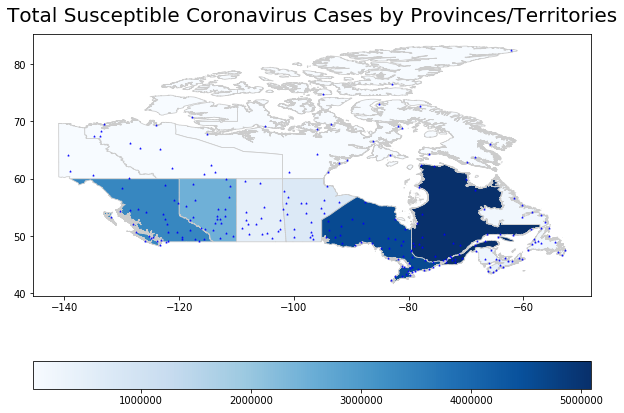

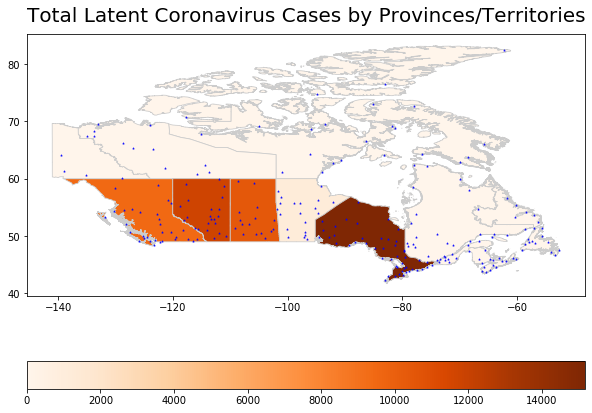

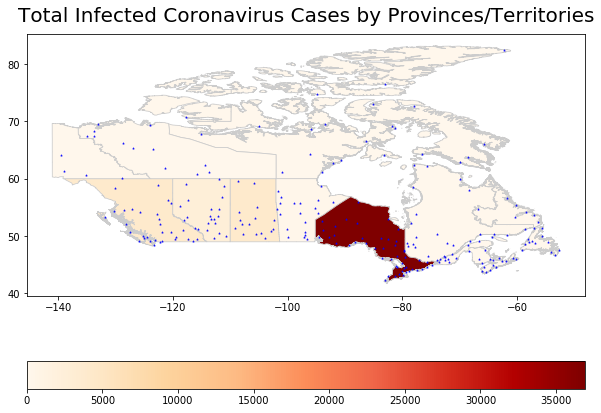

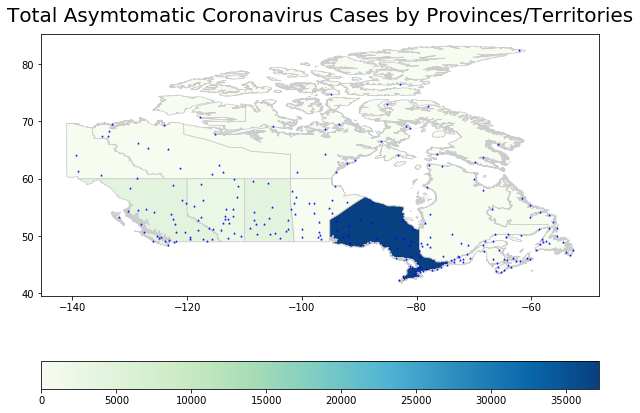

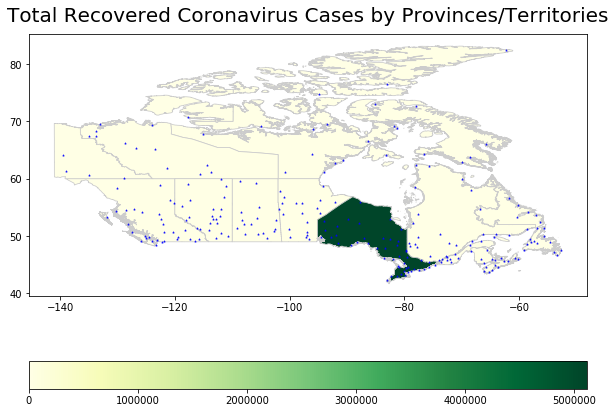

In [45]:
prov_aggregate_graph(model_result)

In [85]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
# City Level Voronoi Map (Coloured)

city_numpy = can_city[['lng', 'lat']].to_numpy()

def city_aggregate(mat_df):
    model_t = mat_df.T
    model_t['confirmed'] = model_t[2] + model_t[3] + model_t[4]
    model_t = model_t.drop(columns  = [2, 3, 4])
    model_t['city'] = can_city['city'].tolist()
    model_t.columns = ['susceptible', 'latent', 'confirmed', 'city']
    return model_t

def city_aggregate_graph(mat_df):
    city_aggregate_df = city_aggregate(mat_df)
    
    type_graph_list = city_aggregate_df.columns.tolist()[:-1]
    
    cmap_list = ['Blues', 'Oranges', 'OrRd']
    
    for index in range(len(type_graph_list)):
        type_graph = type_graph_list[index]
        type_graph_str = type_graph[0].upper() + type_graph[1:] 
        # find min/max values for normalization
        minima = min(city_aggregate_df[type_graph])
        maxima = max(city_aggregate_df[type_graph])

        # normalize chosen colormap
        norm = mpl.colors.Normalize(vmin=minima, vmax=maxima)
        mapper = cm.ScalarMappable(norm=norm, cmap=cmap_list[index])

        fig, ax = plt.subplots(1, figsize=(10, 8))

        can_map.plot(color = 'white', alpha = 0.1, ax=ax, edgecolor='black')

        vor = Voronoi(city_numpy)

        voronoi_plot_2d(vor, ax = ax, line_width = 0.2,  
                        show_vertices=False, 
                        s=1,
                        point_size = 1)
        for r in range(len(vor.point_region)):
            region = vor.regions[vor.point_region[r]]
            if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=mapper.to_rgba(city_aggregate_df[type_graph][r]),
                        alpha = 0.4)
        ax.set_title('Total ' + type_graph_str + ' Coronavirus Cases by Municipalities', 
                     fontdict = {'fontsize':20}, pad = 12.5)
        mapper._A = []
        cbar = fig.colorbar(mapper, orientation="horizontal")
        plt.show()

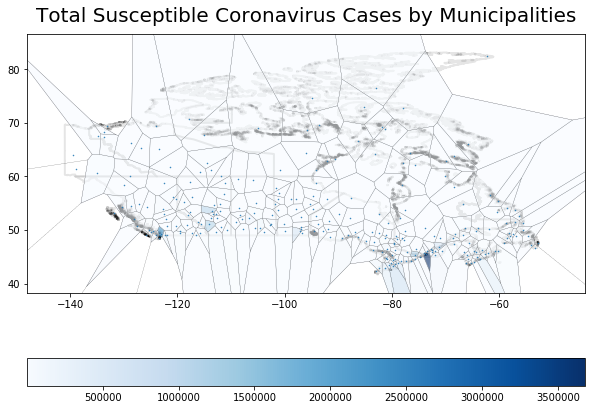

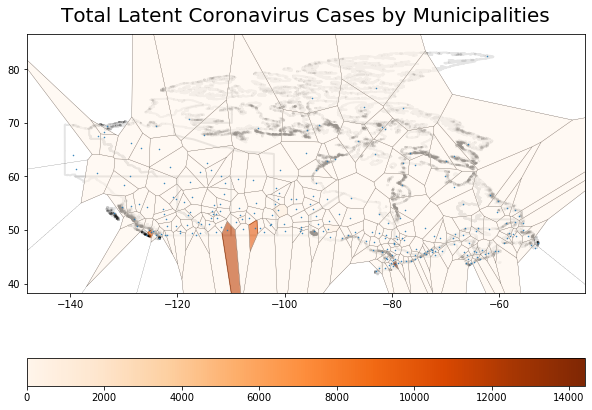

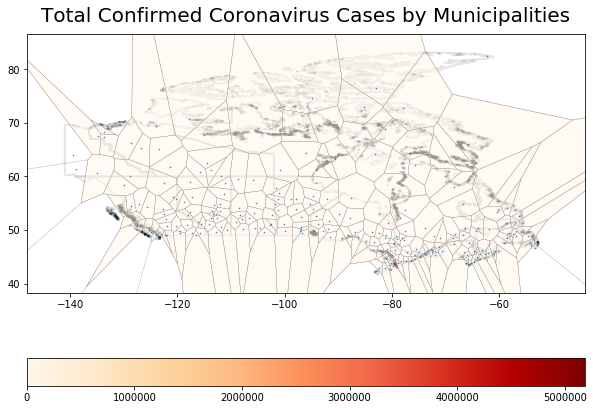

In [83]:
city_aggregate_graph(model_result)

In [58]:
model_result_test = scipy.io.loadmat("pop_today.mat")["pop"]
model_result_test = pd.DataFrame(model_result_test)

In [59]:
model_result_test

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,4094273,3683563,2120323,1927856,956407,1401881,831524,547479,483537,687189,...,102,143,161,79,71,59,29,15,14,0
1,934,780,481,438,221,297,160,124,113,167,...,0,0,0,0,0,0,0,0,0,0
2,383,395,229,225,82,153,88,58,53,81,...,0,0,1,0,0,0,0,0,0,0
3,1293,1145,650,641,293,415,269,171,133,193,...,0,0,0,0,0,0,0,0,0,0
4,3403,3055,1742,1609,806,1102,721,455,395,614,...,0,0,0,0,0,0,0,0,0,0


In [54]:
model_result

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,12185,3677354,2313347,1144984,1109886,1057971,720870,631986,624081,450960,...,131,129,123,107,92,75,31,11,14,5
1,14408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36365,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36642,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5112913,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


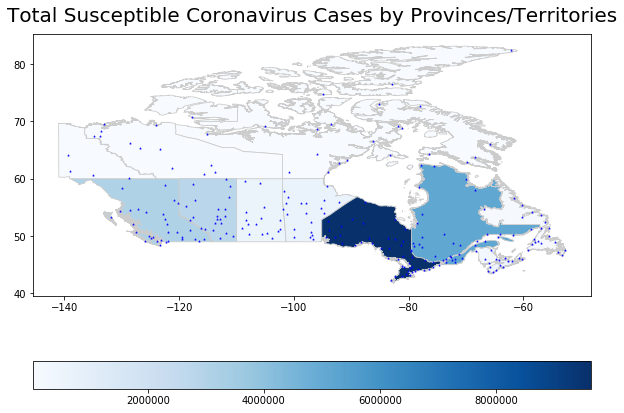

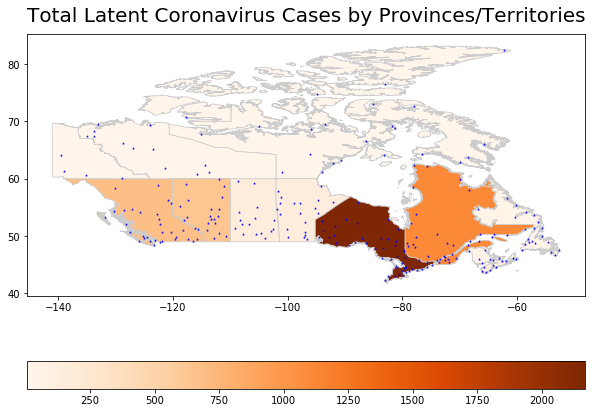

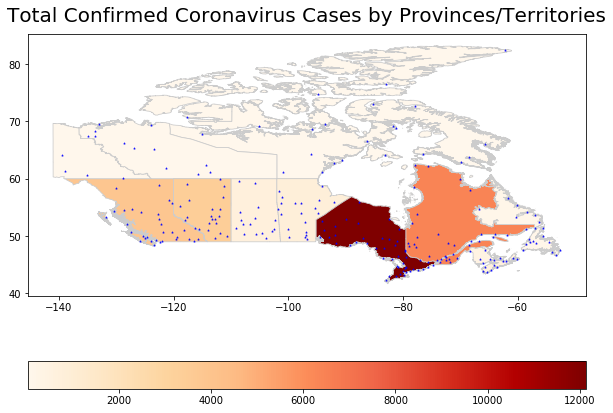

In [64]:
prov_aggregate_graph(model_result_test)

In [66]:
prov_aggregate(model_result_test)

,province,susceptible,latent,confirmed
0,Alberta,2808039,638,3400
1,British Columbia,3096257,686,3882
2,Manitoba,652624,154,835
3,New Brunswick,313882,63,411
4,Newfoundland and Labrador,158252,33,173
5,Northwest Territories,25730,5,31
6,Nova Scotia,516551,137,598
7,Nunavut,30208,8,39
8,Ontario,9645572,2167,12123
9,Prince Edward Island,42074,5,63


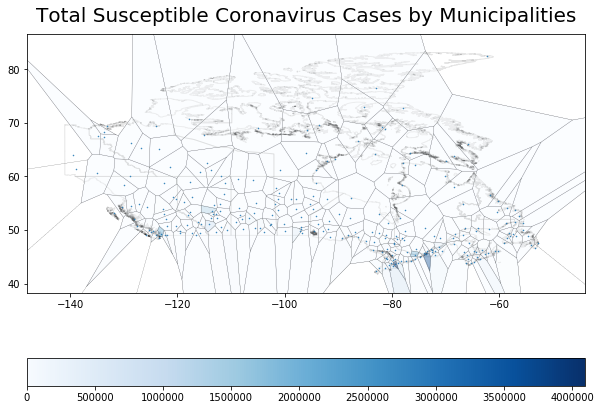

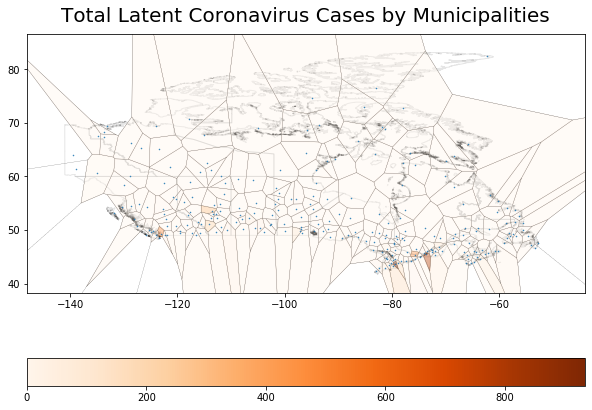

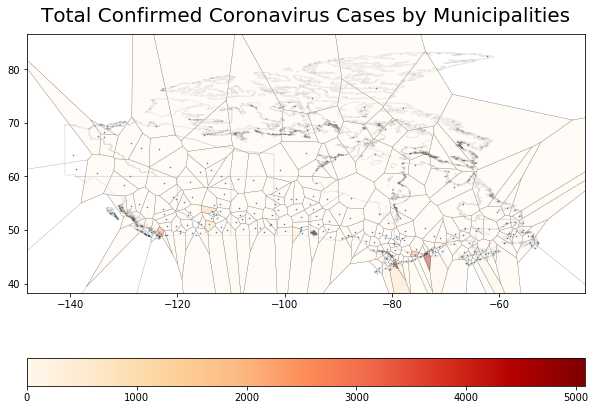

In [86]:
city_aggregate_graph(model_result_test)

In [142]:
pre_policy_hist = scipy.io.loadmat("pre_policy_hist.mat")['pop']

In [143]:
pre_policy_hist = np.swapaxes(pre_policy_hist, 0, 2)
vmin = 0
vmax = 12123

Simulation Data at Day 0
                     province  susceptible  latent  confirmed
0                     Alberta      2902226      32         13
1            British Columbia      3338638      28         15
2                    Manitoba       687568       7          2
3               New Brunswick       308393       2          2
4   Newfoundland and Labrador       171507       0          0
5       Northwest Territories        27193       0          0
6                 Nova Scotia       527867       6          2
7                     Nunavut        31659       0          0
8                     Ontario      9714611      93         59
9        Prince Edward Island        42342       0          0
10                     Quebec      4711803      37         21
11               Saskatchewan       632539       6          4
12                      Yukon        24412       0          0
                     province  susceptible  latent  confirmed
0                     Alberta      2902226   

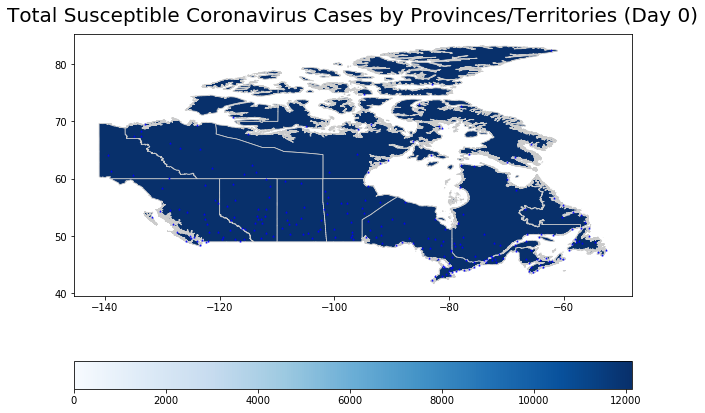

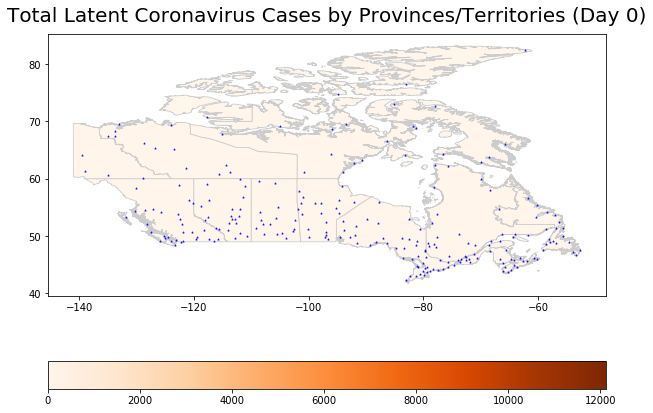

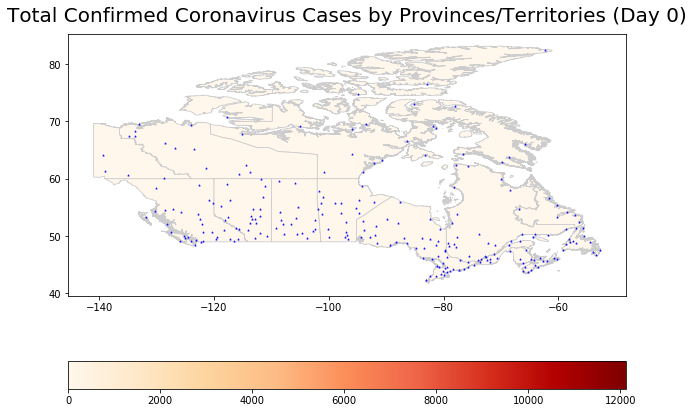

In [144]:
day = 0
local_day_df = pd.DataFrame(pre_policy_hist[day])
print("Simulation Data at Day "+ str(day))
print(prov_aggregate(local_day_df))
prov_aggregate_graph(local_day_df, vmin, vmax, day)

In [161]:
day = 80
local_day_df = pd.DataFrame(pre_policy_hist[day])
print("Simulation Data at Day "+ str(day))
prov_aggregate(local_day_df)['confirmed']

Simulation Data at Day 80


0      3952
1      4356
2       943
3       450
4       219
5        35
6       652
7        45
8     13302
9        58
10     7151
11      773
12       40
Name: confirmed, dtype: int64

Simulation Data at Day 30
                     province  susceptible  latent  confirmed
0                     Alberta      2809545     461       1134
1            British Columbia      3097485     549       1253
2                    Manitoba       652698     105        279
3               New Brunswick       312581      56        123
4   Newfoundland and Labrador       157894      21         67
5       Northwest Territories        25766       7         11
6                 Nova Scotia       518670      74        205
7                     Nunavut        30465       5         19
8                     Ontario      9658963    1617       3896
9        Prince Edward Island        42163       8         22
10                     Quebec      5167193     857       2135
11               Saskatchewan       611580     113        240
12                      Yukon        22201       3         13
                     province  susceptible  latent  confirmed
0                     Alberta      2809545  

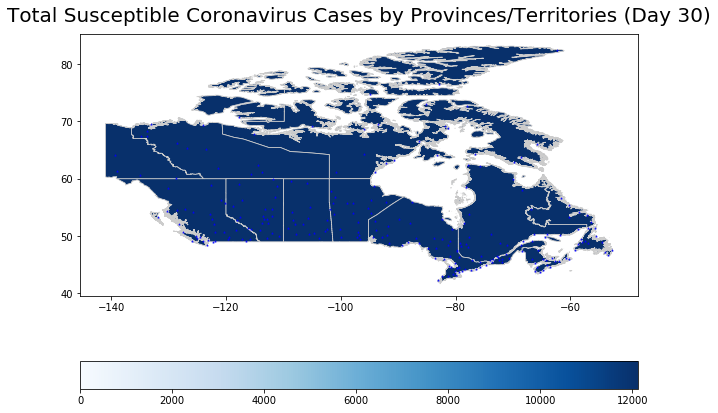

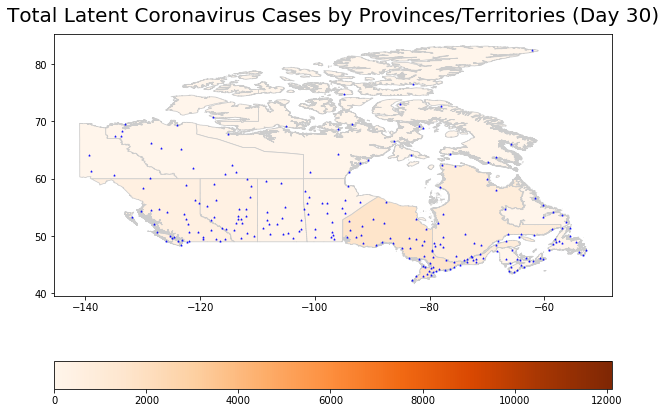

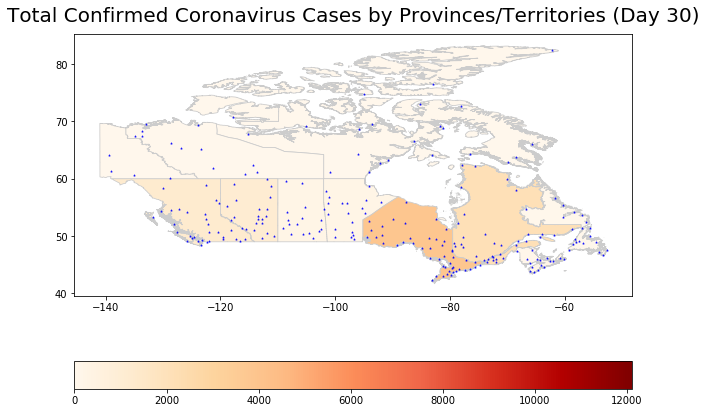

In [145]:
day = 30
local_day_df = pd.DataFrame(pre_policy_hist[day])
print("Simulation Data at Day "+ str(day))
print(prov_aggregate(local_day_df))
prov_aggregate_graph(local_day_df, vmin, vmax, day)

Simulation Data at Day 60
                     province  susceptible  latent  confirmed
0                     Alberta      2809628     552       2640
1            British Columbia      3097735     632       2939
2                    Manitoba       652607      83        616
3               New Brunswick       313634      72        290
4   Newfoundland and Labrador       157893      27        146
5       Northwest Territories        25808      10         16
6                 Nova Scotia       517663     124        501
7                     Nunavut        30257       7         26
8                     Ontario      9653390    2006       9127
9        Prince Edward Island        42012       8         43
10                     Quebec      5158412    1063       4859
11               Saskatchewan       613022     145        569
12                      Yukon        22311       5         19
                     province  susceptible  latent  confirmed
0                     Alberta      2809628  

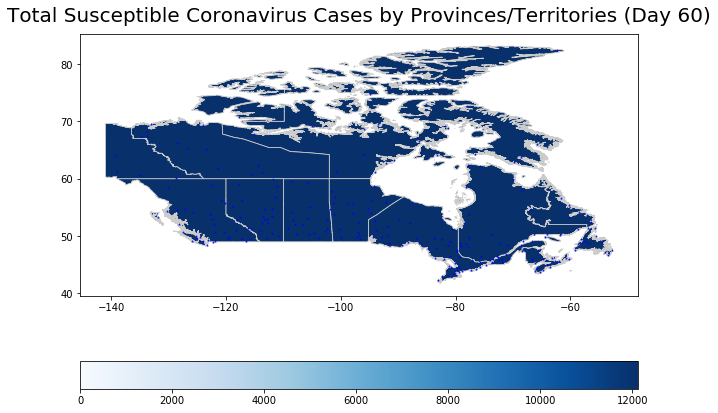

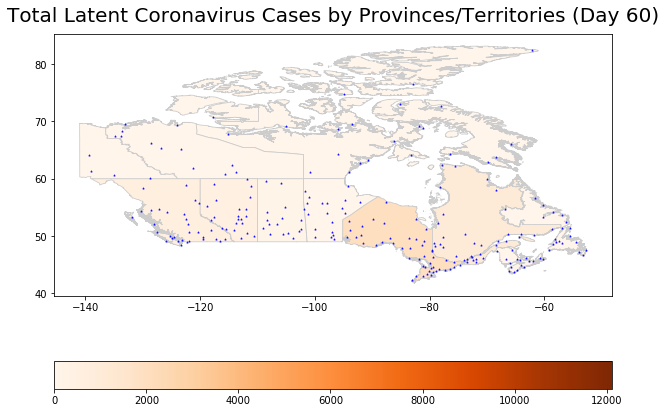

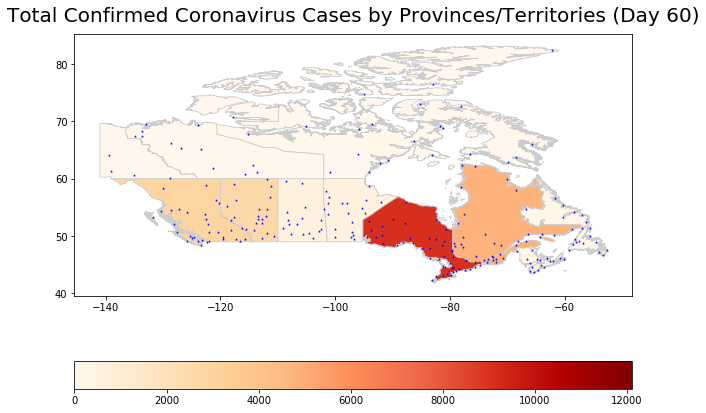

In [146]:
day = 60
local_day_df = pd.DataFrame(pre_policy_hist[day])
print("Simulation Data at Day "+ str(day))
print(prov_aggregate(local_day_df))
prov_aggregate_graph(local_day_df, vmin, vmax, day)

Simulation Data at Day 80
                     province  susceptible  latent  confirmed
0                     Alberta      2806326     674       3952
1            British Columbia      3097579     747       4356
2                    Manitoba       651701     146        943
3               New Brunswick       313295      72        450
4   Newfoundland and Labrador       157670      32        219
5       Northwest Territories        25255       3         35
6                 Nova Scotia       518205     128        652
7                     Nunavut        30565       7         45
8                     Ontario      9646031    2193      13302
9        Prince Edward Island        42204      10         58
10                     Quebec      5160265    1208       7151
11               Saskatchewan       612135     151        773
12                      Yukon        22045       4         40
                     province  susceptible  latent  confirmed
0                     Alberta      2806326  

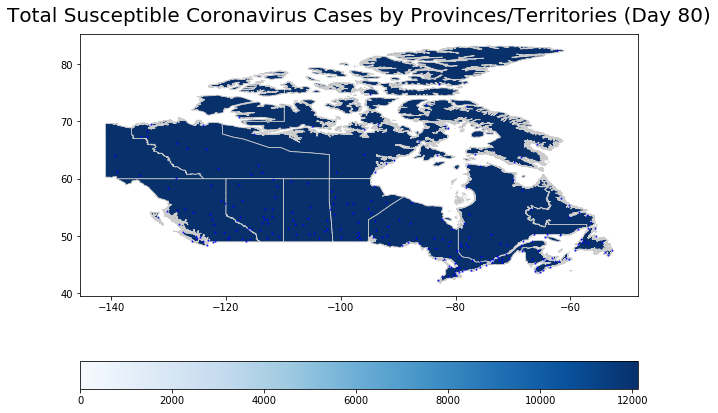

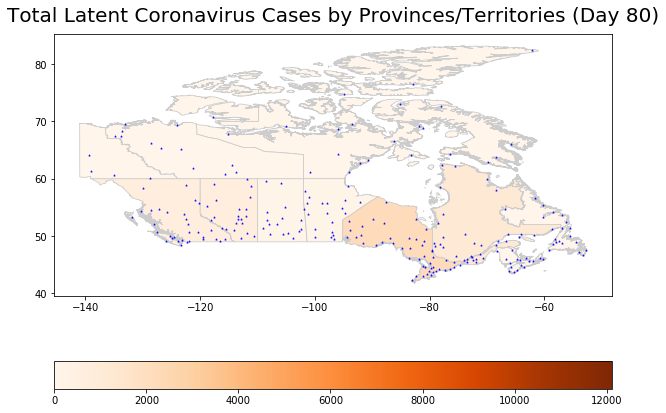

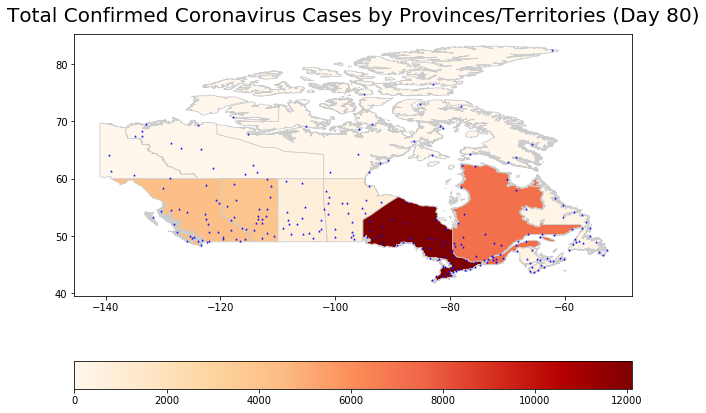

In [147]:
day = 80
local_day_df = pd.DataFrame(pre_policy_hist[day])
print("Simulation Data at Day "+ str(day))
print(prov_aggregate(local_day_df))
prov_aggregate_graph(local_day_df, vmin, vmax, day)